In [1]:
import numpy as np
import networkx as nx
import math
import matplotlib
import matplotlib.pyplot as plt
from typing import List
#colors = ['blue','red','orange','green']


def random_graph(n_clients : int, map_width : float, map_height : float) -> nx.Graph:
    client_locations_x = np.random.random((n_clients,1))*map_width
    client_locations_y = np.random.random((n_clients,1))*map_height
    client_locations = np.hstack([client_locations_x,client_locations_y])
    graph = nx.Graph()
    for i,(x,y) in enumerate(client_locations):
        graph.add_node(i,pos=(x,y))
    
    #TODO: renderlo piu efficiente con n*(n-1)/2
    for i,(x,y) in enumerate(client_locations):
        for j,(xx,yy) in enumerate(client_locations):
            if i!= j:
                graph.add_edge(i,j,weight = math.sqrt((xx-x)**2+(yy-y)**2))
    return graph,client_locations
def get_truck_colors(n_trucks : int) -> List[str]:
    cmap = matplotlib.colormaps['Spectral']
    color_rgba  = cmap(np.linspace(0.0,1.0,n_trucks))
    colors_hex = []
    for c in color_rgba:
        
        colors_hex.append('#{:02x}{:02x}{:02x}'.format(*(c*255).astype(int)))
    return colors_hex

get_truck_colors(2)

['#9e0142', '#5e4fa2']

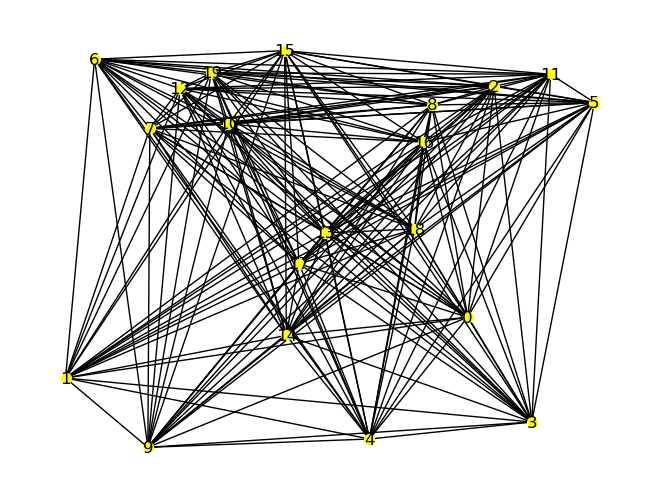

In [2]:
grid_width = 200
grid_height = 200
n_clients = 20
graph,client_locations = random_graph(n_clients,grid_width,grid_height)  
nx.draw(graph, nx.get_node_attributes(graph, 'pos'), with_labels=True, node_size=50,node_color = 'yellow')

In [3]:
n_trucks = 4
random_path = np.random.randint(0, n_trucks, size=n_clients)

In [4]:
from sklearn.cluster import KMeans
locs = [ (loc[0],loc[1]) for loc in client_locations]

kmeans = KMeans(n_clusters=n_trucks).fit(locs)
random_path = kmeans.predict(locs)

/home/fogliodicarta/miniconda3/envs/insetti/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
for c in client_locations:
    print(c)

[152.46849415  66.14459253]
[21.04270925 35.7514747 ]
[161.10617485 181.63819698]
[173.42647866  13.75547559]
[120.37489931   5.25789524]
[193.92087976 173.51675368]
[ 30.53226447 195.18514347]
[ 48.60033641 160.61220273]
[140.79928649 172.31269906]
[47.949697    1.09070857]
[ 74.29703493 162.89180213]
[179.59275505 187.65233652]
[ 58.42496021 180.48781886]
[105.85945523 108.28284617]
[93.2087846  57.06582315]
[ 92.66531788 199.46602177]
[138.02842034 153.74713107]
[97.38842568 92.87738345]
[135.15292855 110.27266055]
[ 68.70057839 188.37482789]


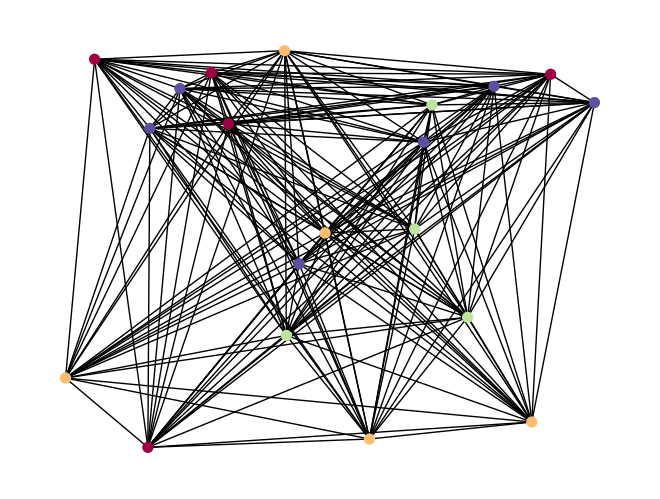

In [5]:
colors = get_truck_colors(n_trucks)
node_color_map = []
for client,truck in enumerate(random_path):
    node_color_map.append(colors[truck])
nx.draw(graph, nx.get_node_attributes(graph, 'pos'), with_labels=False, node_size=50,node_color = node_color_map)

In [7]:
tsp_graph = nx.Graph()
for i,(x,y) in enumerate(client_locations):
    tsp_graph.add_node(i,pos=(x,y))
for truck in range(n_trucks):
    indices = np.where(random_path == truck)[0]
    #random_path[indices]
    tsp_solution = nx.approximation.traveling_salesman_problem(graph,nodes = indices)
    #list(indices)
    for i in range(len(tsp_solution)-1):
        tsp_graph.add_edge(tsp_solution[i],tsp_solution[i+1])

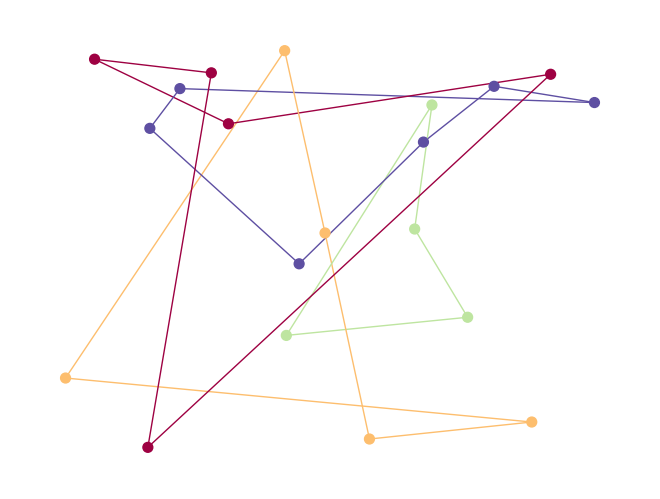

In [8]:
edge_colors = [ node_color_map[edge[0]]
    for edge in tsp_graph.edges()
]
nx.draw(tsp_graph, nx.get_node_attributes(graph, 'pos'), with_labels=False, node_size=50,
        node_color = node_color_map,
        edge_color = edge_colors)#

In [9]:
node_color_map

['#5e4fa2',
 '#9e0142',
 '#5e4fa2',
 '#bee5a0',
 '#bee5a0',
 '#9e0142',
 '#5e4fa2',
 '#bee5a0',
 '#fdbe6e',
 '#5e4fa2',
 '#5e4fa2',
 '#fdbe6e',
 '#fdbe6e',
 '#9e0142',
 '#bee5a0',
 '#fdbe6e',
 '#9e0142',
 '#fdbe6e',
 '#9e0142',
 '#bee5a0']